<a href="https://colab.research.google.com/github/remre/striveschool/blob/main/bos/preds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                              ])
t_transform = transforms.Compose([transforms.ToTensor()
                                 #transform.normalize([])

])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=t_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100)

In [ ]:
for images, labels in trainloader:
  print(images.shape)


In [ ]:
sample = next(iter(trainset))
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [ ]:
trainset[11][0][0][1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7451, 0.9569, 0.9725, 1.0000,
        1.0000, 0.6078, 0.7922, 0.8314, 0.5882, 0.0353, 0.0000, 0.0118, 0.0000,
        0.0000])

In [ ]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
label

9

In [ ]:
pred = model(image.unsqueeze(0))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
pred

tensor([[-0.0706, -0.0391, -0.1367, -0.0497, -0.0890, -0.0077, -0.0293, -0.1354,
         -0.0543, -0.0431]], grad_fn=<AddmmBackward>)

In [ ]:
pred.argmax(dim=1)

tensor([5])

In [ ]:
images

In [ ]:
labels

tensor([3, 6, 3, 8, 0, 2, 6, 9, 7, 0])

In [ ]:
images.shape

torch.Size([10, 1, 28, 28])

In [ ]:
preds = model(images)

In [ ]:
preds

In [ ]:
preds.argmax(dim=1)

tensor([8, 8, 5, 5, 5, 5, 6, 5, 5, 5])

In [ ]:
preds.argmax(dim=1).eq(labels).sum().item()

0

In [ ]:
## TODO: Your network here
class NeuralNetworkk(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3,kernel_size =5):
        super().__init__()

        self.conv1 = nn.Conv2d(input_dim,num_hidden1,kernel_size = kernel_size)
        self.conv2 = nn.Conv2d(num_hidden1,num_hidden2,kernel_size = kernel_size)

        self.fc1 = nn.Linear(num_hidden2*4*4, num_hidden3) 
        self.fc2 = nn.Linear(num_hidden3, 60)
        self.fc3 = nn.Linear(60, 10)

        self.drop = nn.Dropout(p = 0.25)
       
    def forward(self,x):
      #for layer 1 
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, kernel_size = 2 , stride = 2)

      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, kernel_size = 2 , stride = 2)


      x = F.relu(self.fc1(x.reshape(-1,12*4*4)))
      x = F.relu(self.fc2(x))

      x = self.drop(x) # check if we are overfitting another example of drop is below

      h1 = F.relu(self.x)
      h2 = F.relu(self.h1)
      drop = self.drop(h1+h2)
      logits = self.fc3(drop)

      x = self.fc3(x)

      #output = F.softmax(x, dim=1)
      return x
model = NeuralNetworkk(1, 6,12, 120)

# bt part


##**takeitout**

In [ ]:
summary(model,(1,28,28),64)

In [ ]:
def get_num_correct(preds,labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
torch.set_grad_enabled(True)
torch.set_printoptions(linewidth=120)
optimizer = optim.Adam(model.parameters(),lr = 0.01)

In [ ]:


for epoch in range(5):
  total_loss = 0 
  total_correct = 0 
  for batch in trainloader:
    images, labels = batch 

    preds = model(images)
    loss = F.cross_entropy(preds,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds,labels)

print('epoch: ',epoch, 'total_correct: ', total_correct/60000, 'loss: ' , total_loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch:  4 total_correct:  0.8524166666666667 loss:  243.06950856745243


In [ ]:
total_correct/60000

0.8524166666666667

In [ ]:
def get_all_preds(model,loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch

    preds = model(images)
    all_preds = torch.cat((all_preds,preds),dim = 0)
  return all_preds

In [ ]:
predloader = torch.utils.data.DataLoader(trainset, batch_size=1000)
train_preds = get_all_preds(model,predloader)

In [ ]:
train_preds.grad_fn

In [ ]:
with torch.no_grad():
  predloader = torch.utils.data.DataLoader(trainset, batch_size=1000)
  train_preds = get_all_preds(model,predloader)

In [ ]:
train_preds.requires_grad

False

In [ ]:
preds_correct = get_num_correct(train_preds,trainset.targets)

print('total correct: ', preds_correct)
print('accuracy: ', preds_correct/len(trainset))

total correct:  50854
accuracy:  0.8475666666666667


#confusion matrix

In [ ]:
#confusion matrix part by hard
stacked = torch.stack((trainset.targets, train_preds.argmax(dim=1)), dim= 1)

In [ ]:
stacked.shape

torch.Size([60000, 2])

In [ ]:
stacked[0].tolist()

[9, 9]

In [ ]:
cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
for p in stacked:
  tl, pl = p.tolist()
  cmt[tl,pl] = cmt[tl,pl] + 1

In [ ]:
cmt

tensor([[5092,   20,   71,  271,   41,    2,  462,    1,   40,    0],
        [   8, 5816,    7,  129,   14,    1,   21,    0,    4,    0],
        [  74,    5, 3940,   73, 1176,    0,  700,    0,   32,    0],
        [ 160,  111,    4, 5345,  272,    0,  106,    0,    2,    0],
        [   6,    6,  254,  242, 5243,    0,  242,    0,    7,    0],
        [   6,    5,   13,    3,    5, 5403,    4,  307,  119,  135],
        [1263,   26,  497,  235, 1126,    0, 2782,    0,   71,    0],
        [   0,    0,    0,    4,    0,   68,    3, 5808,   41,   76],
        [  54,    3,   42,   67,   68,    4,   91,    6, 5661,    4],
        [   0,    0,    0,    0,    3,   20,    2,  438,    8, 5529]])

In [ ]:
a = {1:'asdnasnda', 2:'ababan', 3:"asdasda"}

In [ ]:
a[1]

'asdnasnda'

In [ ]:
#draw a confusion matrix
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
  cm = confusion_matrix(trainset.targets,train_preds.argmax(dim=1))
cm

array([[5092,   20,   71,  271,   41,    2,  462,    1,   40,    0],
       [   8, 5816,    7,  129,   14,    1,   21,    0,    4,    0],
       [  74,    5, 3940,   73, 1176,    0,  700,    0,   32,    0],
       [ 160,  111,    4, 5345,  272,    0,  106,    0,    2,    0],
       [   6,    6,  254,  242, 5243,    0,  242,    0,    7,    0],
       [   6,    5,   13,    3,    5, 5403,    4,  307,  119,  135],
       [1263,   26,  497,  235, 1126,    0, 2782,    0,   71,    0],
       [   0,    0,    0,    4,    0,   68,    3, 5808,   41,   76],
       [  54,    3,   42,   67,   68,    4,   91,    6, 5661,    4],
       [   0,    0,    0,    0,    3,   20,    2,  438,    8, 5529]])

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5092   20   71  271   41    2  462    1   40    0]
 [   8 5816    7  129   14    1   21    0    4    0]
 [  74    5 3940   73 1176    0  700    0   32    0]
 [ 160  111    4 5345  272    0  106    0    2    0]
 [   6    6  254  242 5243    0  242    0    7    0]
 [   6    5   13    3    5 5403    4  307  119  135]
 [1263   26  497  235 1126    0 2782    0   71    0]
 [   0    0    0    4    0   68    3 5808   41   76]
 [  54    3   42   67   68    4   91    6 5661    4]
 [   0    0    0    0    3   20    2  438    8 5529]]


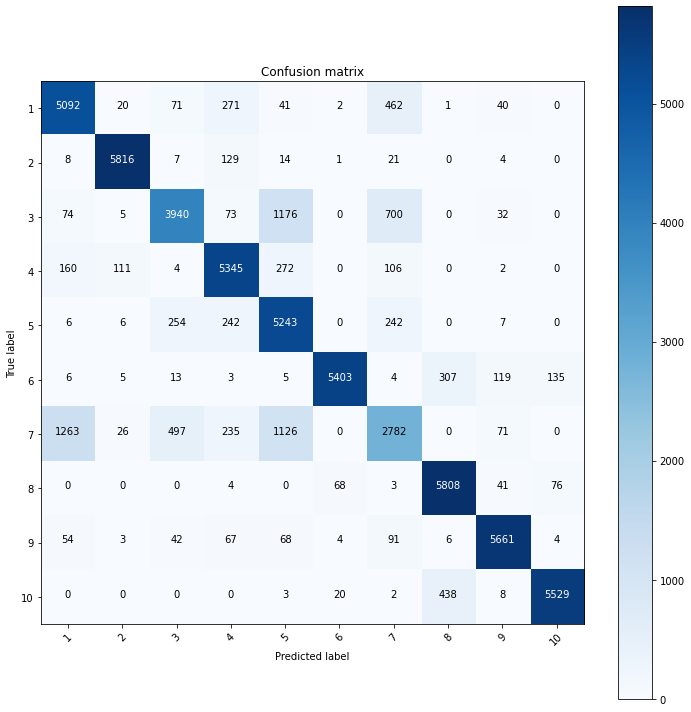

In [ ]:
names = ('1','2','3','4','5','6','7','8','9','10')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,names)

In [ ]:
trainset.targets[:10]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
loss_funcc = nn.NLLLoss()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimiser = optim.SGD(model.parameters(), lr = 1e-3)
criterion = F.nll_loss

In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
  losss = []
  for batchidx, (x,y) in enumerate(trainloader):
    #x, y = batch_idx
    #b = x.size(0)
    #x = x.view(b,-1)
    #forward 
    #x = x.to(device)
    #y = y.to(device)
    logits = model(x)


    #compute objective function
    J= error(logits,y)

    #cleaning the gradients
    optimizer.zero_grad()

    #compute the part derivs
    J.backward()

    #step
    optimizer.step()



    losss.append(J.item()) 

losss = []
accuracy = []
model.train()
for batch_idx in testloader:
  x, y = batch_idx

  #b = x.size(0)
  #x = x.view(b,-1)
  #x.to(device)
  #y.to(device)
  #forward 
  with torch.no_grad():
    
    logits = model(x)


  #compute objective function
  J= error(logits,y)

  losss.append(J.item()) 
  accuracy.append(y.eq(logits.detach().argmax(dim=1)).float().mean())
  
  print(f'Epoch {epoch + 1 }, test loss : {torch.tensor(losss).mean():.2f}')
  print(f'accuracy {torch.tensor(accuracy).mean():.2f}')
    
  print(f'Epoch {epoch + 1 }, train loss : {torch.tensor(losss).mean():.2f}')

In [ ]:
#x = x.view(b,-1)
x.shape

torch.Size([64, 784])

In [ ]:
'''
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
error = nn.CrossEntropyLoss()

learning_rate = 0.001
loss_funcc = nn.NLLLoss()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = F.nll_loss

print(model)'''

NeuralNetworkk(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
)


In [ ]:
# Training the Model
num_epochs = 20
for epoch in range(num_epochs):
    for batch_idx,(data,target) in enumerate(trainloader):
        # Get Data to CUDA if possible
        data = data.to(device=device)
        target = targets.to(device=device)
        # Get to correct shape
        #data = data.reshape(data.shape[0],-1)
        
        # Forward
        score = model(data)
        loss = error(score,target)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient Descent or Adam Step
        optimizer.step()

NameError: ignored

In [ ]:
def check_accuracy(loader,model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            #x = x.to(device)
            #y= y.to(device)

            #x = x.reshape(x.shape[0],-1)

            scores = model(x)
            _,predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    model.train()
    

In [ ]:
check_accuracy(trainloader,model)
check_accuracy(testloader,model)

Got 54906 / 60000 with accuracy 91.51
Got 8917 / 10000 with accuracy 89.17


TypeError: ignored

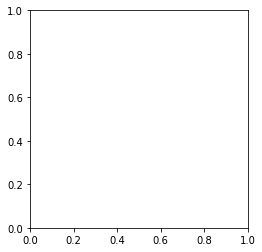

In [ ]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

# Read image
#im = imageio.imread("denemee.png")
#print("Shape of the image tensor: {}".format(im.shape))
plt.imshow(image)

(869, 862)


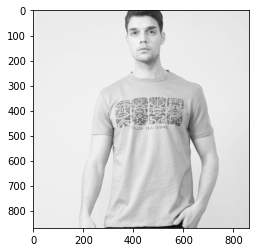

In [ ]:
# Red channel
im_red = im[:,:,0]
print(im_red.shape)
plt.imshow(im_red, cmap='gray')